Done!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


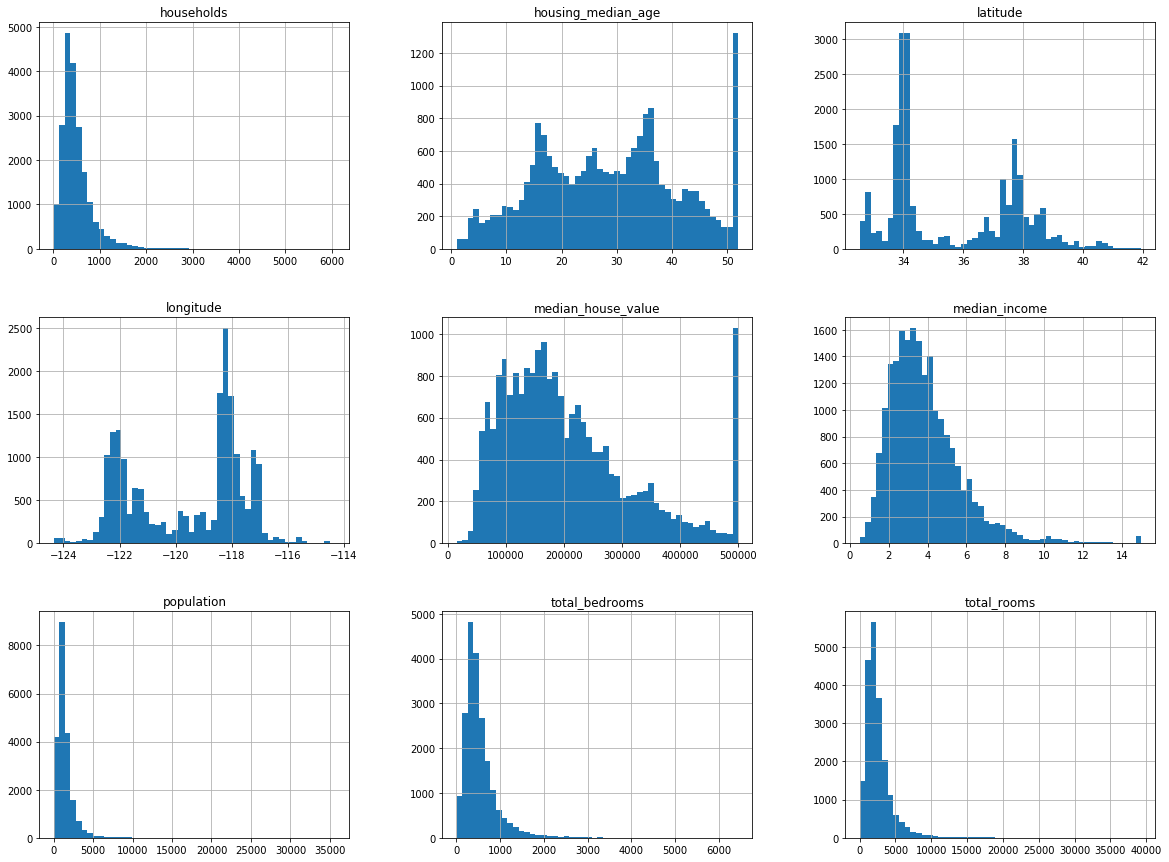

4128
0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
5       -122212.15
6       -122212.16
7       -122212.16
8       -122222.16
9       -122212.16
10      -122222.15
11      -122222.15
12      -122222.15
13      -122222.16
14      -122222.15
15      -122222.15
16      -122232.15
17      -122232.15
18      -122222.16
19      -122232.16
20      -122232.15
21      -122232.15
22      -122232.16
23      -122232.16
24      -122232.16
25      -122242.15
26      -122242.15
27      -122242.15
28      -122242.16
29      -122242.16
           ...    
20610   -121520.90
20611   -121510.90
20612   -121520.92
20613   -121510.91
20614   -121500.92
20615   -121500.92
20616   -121490.92
20617   -121490.94
20618   -121510.94
20619   -121520.99
20620   -121440.95
20621   -121430.99
20622   -121401.00
20623   -121330.97
20624   -121370.96
20625   -121480.88
20626   -121390.82
20627   -121280.87
20628   -121440.90
20629   -121350.88
20630   -121280.71
20631  

In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import hashlib
from six.moves import urllib
from sklearn.model_selection import StratifiedShuffleSplit

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


def test_set_check(indentifier, test_ratio, hash):
    return hash(np.int64(indentifier)).digest()[-1]<256*test_ratio

def train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    print(ids)
    in_test_set = ids.apply(lambda id: test_set_check(id, 0.2, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
    
def split_train_test(data, test_ratio):
    shuffeld_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    print(test_set_size)
    test_indices = shuffeld_indices[:test_set_size]
    training_indices = shuffeld_indices[test_set_size:]
    return data.iloc[test_indices],data.iloc[training_indices]

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)




fetch_housing_data()
print("Done!")
housing = load_housing_data()
housing.head(10)
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
housing.info()
plt.show()
test_data,training_data = split_train_test(housing,0.2)
test_data.head(5)
housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_test_by_id(housing_with_id, 0.2, "id")
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0, inplace = True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts()

for set in (strat_train_set, strat_test_set):
    set.drop("income_cat",axis=1, inplace = True)

housing = strat_train_set.copy()



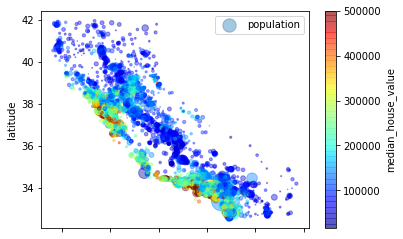

In [2]:
housing.plot(kind="scatter", x = "longitude",y = "latitude", alpha = 0.4, s = housing["population"]/100, label ="population", c = "median_house_value", cmap=plt.get_cmap("jet"),colorbar =True,)
plt.legend()


In [3]:

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

D:\Programs\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFA8E31F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BFA82650F0>]], dtype=object)

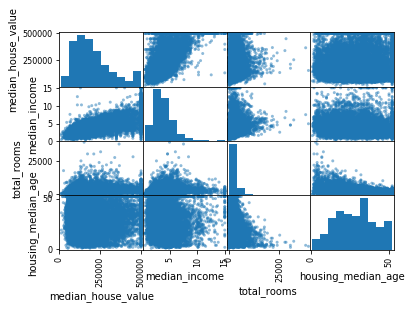

In [4]:
from pandas.tools.plotting import scatter_matrix 
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes])

In [5]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


In [6]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
print("Hello!")


Hello!


In [7]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")

housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
housing_num.info()
print(imputer.statistics_)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [8]:
X = imputer.transform(housing_num)
print(X)
print(housing_num.columns)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.head(10)

[[ -121.89      37.29      38.     ...,   710.       339.         2.7042]
 [ -121.93      37.05      14.     ...,   306.       113.         6.4214]
 [ -117.2       32.77      31.     ...,   936.       462.         2.8621]
 ..., 
 [ -116.4       34.09       9.     ...,  2098.       765.         3.2723]
 [ -118.01      33.82      31.     ...,  1356.       356.         4.0625]
 [ -122.45      37.77      52.     ...,  1269.       639.         3.575 ]]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
print (encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
print(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
housing_cat_encoded

[[0]
 [0]
 [4]
 ..., 
 [1]
 [0]
 [3]]


array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [11]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot



array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y =None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, bedrooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,population_per_household]
attr_adder =CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder


housing_extra_attributes = pd.DataFrame(
    housing_extra_attributes,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attributes.head()


print("Hello!")
print (housing_extra_attributes)      

    
                              

ValueError: DataFrame constructor not properly called!

In [22]:

from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values




from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
print(num_attribs)
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('lab_binarizer', LabelBinarizer()),
    ])


full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("num_pipeline12", cat_pipeline),
    ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared
housing_prepared.shape





['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


(16512, 16)

In [34]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
print(housing.shape)
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_data.shape)
print("Predictions:", lin_reg.predict(some_data_prepared))



(16512, 9)
(5, 9)


ValueError: shapes (5,14) and (16,) not aligned: 14 (dim 1) != 16 (dim 0)